# Getting the Data I need
## Crash Locations:
Get the Crash locations data from https://data.qld.gov.au/dataset/crash-data-from-queensland-roads/resource/e88943c0-5968-4972-a15f-38e120d72ec0
Fileter it on manly south east QLD and for 2014-2016


In [296]:
library("readr")
Crash_Sev_Total <- read_csv("./locations.csv")
Crash_Sev_Filtered <- Crash_Sev_Total[(Crash_Sev_Total$Loc_Post_Code >= 4000 &
                                       Crash_Sev_Total$Loc_Post_Code < 4800 &
                                       Crash_Sev_Total$Crash_Year >= 2014 &
                                       Crash_Sev_Total$Crash_Year <= 2016 &
                                       Crash_Sev_Total$Crash_Longitude_GDA94 >= 147.7 &
                                       Crash_Sev_Total$Crash_Latitude_GDA94 <= -20.5),]
head(Crash_Sev_Filtered)

Parsed with column specification:
cols(
  .default = col_character(),
  Crash_Ref_Number = col_integer(),
  Crash_Year = col_integer(),
  Crash_Hour = col_integer(),
  Crash_Longitude_GDA94 = col_double(),
  Crash_Latitude_GDA94 = col_double(),
  Count_Casualty_Fatality = col_integer(),
  Count_Casualty_Hospitalised = col_integer(),
  Count_Casualty_MedicallyTreated = col_integer(),
  Count_Casualty_MinorInjury = col_integer(),
  Count_Casualty_Total = col_integer(),
  Count_Unit_Car = col_integer(),
  Count_Unit_Motorcycle_Moped = col_integer(),
  Count_Unit_Truck = col_integer(),
  Count_Unit_Bus = col_integer(),
  Count_Unit_Bicycle = col_integer(),
  Count_Unit_Pedestrian = col_integer(),
  Count_Unit_Other = col_integer()
)
See spec(...) for full column specifications.


Crash_Ref_Number,Crash_Severity,Crash_Year,Crash_Month,Crash_Day_Of_Week,Crash_Hour,Crash_Nature,Crash_Type,Crash_Longitude_GDA94,Crash_Latitude_GDA94,⋯,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_Total,Count_Unit_Car,Count_Unit_Motorcycle_Moped,Count_Unit_Truck,Count_Unit_Bus,Count_Unit_Bicycle,Count_Unit_Pedestrian,Count_Unit_Other
265851,Hospitalisation,2014,January,Wednesday,14,Rear-end,Multi-Vehicle,152.9305,-27.08331,⋯,0,0,1,2,0,0,0,0,0,0
265852,Medical treatment,2014,January,Wednesday,1,Rear-end,Multi-Vehicle,153.0280,-27.23878,⋯,2,0,2,2,0,0,0,0,0,0
265853,Minor injury,2014,January,Wednesday,16,Angle,Multi-Vehicle,153.0584,-27.41596,⋯,0,2,2,2,0,0,0,0,0,0
265854,Hospitalisation,2014,January,Wednesday,15,Hit object,Single Vehicle,152.9147,-27.69457,⋯,0,0,1,1,0,0,0,0,0,0
265855,Hospitalisation,2014,January,Wednesday,1,Rear-end,Multi-Vehicle,152.8693,-27.60337,⋯,0,1,2,4,0,0,0,0,0,0
265856,Hospitalisation,2014,January,Wednesday,12,Rear-end,Multi-Vehicle,153.3923,-28.03179,⋯,0,0,1,3,0,0,0,0,0,0


## Traffic Data:
Get Qld traffic data averaged by hour of day and day of week for 2014-2016:
https://data.qld.gov.au/dataset/queensland-traffic-data-averaged-by-hour-of-day-and-day-of-week

In [ ]:
#Traffic2012 <- read_csv("./Traffic-Data-Average-by-Hour-by-Day2012.txt")
#Traffic2013 <- read_csv("./Traffic-Data-Average-by-Hour-by-Day2013.txt")
Traffic2014 <- read_csv("./Traffic-Data-Average-by-Hour-by-Day2014.txt")
Traffic2015 <- read_csv("./Traffic-Data-Average-by-Hour-by-Day2015.txt")
Traffic2016 <- read_csv("./Traffic-Data-Average-by-Hour-by-Day2016.txt")
#Traffic2012$YEAR <- "2012"
#Traffic2013$YEAR <- "2013"
Traffic2014$YEAR <- "2014"
Traffic2015$YEAR <- "2015"
Traffic2016$YEAR <- "2016"
Traffic_data <- rbind(Traffic2014, Traffic2015, Traffic2016)
nrow(Traffic_data)
head(Traffic_data)

# Is My Data Fit for Use?
## Crash Data:
- Select a subset of the data and remove any incomplete cases.
- Convert Speed Limit column to a number.
- Create an extra column "sev" with $TRUE/FALSE$ value with Fatal/Hospitalisation as $TRUE$ (Severe) and other values $FALSE$ (Not Severe)

In [297]:
require("stringi")
Crash_Sev <- data.frame(Crash_Sev_Filtered$Crash_Severity, Crash_Sev_Filtered$Crash_Year,
                        Crash_Sev_Filtered$Crash_Day_Of_Week, Crash_Sev_Filtered$Crash_Month,
                        Crash_Sev_Filtered$Crash_Hour, Crash_Sev_Filtered$Crash_Longitude_GDA94,
                        Crash_Sev_Filtered$Crash_Latitude_GDA94, Crash_Sev_Filtered$Loc_Post_Code,
                        Crash_Sev_Filtered$Crash_Speed_Limit, Crash_Sev_Filtered$Crash_Road_Surface_Condition,
                        Crash_Sev_Filtered$Crash_Atmospheric_Condition, Crash_Sev_Filtered$Crash_Lighting_Condition,
                        Crash_Sev_Filtered$Crash_Road_Horiz_Align, Crash_Sev_Filtered$Crash_Road_Vert_Align)
colnames(Crash_Sev) <- c("severity", "year", "day_of_week", "month", "hour", "longitude", "latitude",
                         "postcode", "speed_limit", "road_cond", "atmos_cond", "lighting_cond",
                         "road_hor_al", "road_ver_al")
Crash_Sev <- Crash_Sev[complete.cases(Crash_Sev),]

Crash_Sev$speed_limit <- as.numeric(stri_extract_last(str=Crash_Sev$speed_limit, regex="\\d{2,3}"))

Crash_Sev$sev <- with(Crash_Sev, severity == "Fatal" | severity == "Hospitalisation")

summary(Crash_Sev)
nrow(Crash_Sev)

              severity          year         day_of_week        month      
 Fatal            :  516   Min.   :2014   Friday   :5251   May     : 2968  
 Hospitalisation  :13286   1st Qu.:2014   Monday   :4510   August  : 2859  
 Medical treatment:15153   Median :2015   Saturday :4259   March   : 2834  
 Minor injury     : 3394   Mean   :2015   Sunday   :3709   October : 2787  
                           3rd Qu.:2016   Thursday :5119   July    : 2766  
                           Max.   :2016   Tuesday  :4644   November: 2758  
                                          Wednesday:4857   (Other) :15377  
      hour         longitude        latitude         postcode    
 Min.   : 0.00   Min.   :147.7   Min.   :-29.01   4350   :  810  
 1st Qu.: 9.00   1st Qu.:152.8   1st Qu.:-27.63   4740   :  620  
 Median :13.00   Median :153.0   Median :-27.48   4670   :  572  
 Mean   :12.66   Mean   :152.7   Mean   :-26.97   4207   :  542  
 3rd Qu.:16.00   3rd Qu.:153.1   3rd Qu.:-27.07   4215   :  51

[1] 32349

## Traffic Data:
- Select a subset of the data based on SE QLD locations
- Convert Hour of day into a number

In [298]:
Traffic_data <- Traffic_data[(Traffic_data$LONGITUDE >= 147.7 & Traffic_data$LONGITUDE <= 155.0 &
                              Traffic_data$LATITUDE >= -30.0  & Traffic_data$LATITUDE  <= -20.5),]
drops <- c("DESCRIPTION", "SITE_DISTANCE", "RSECT_ID", "ROAD_NAME", "TDIST_START", "TDIST_END")
Traffic_data <- Traffic_data[, !(names(Traffic_data) %in% drops)]
Traffic_data$HOUR <- as.integer(stri_extract_first(str=Traffic_data$HOUR, regex="\\d{1,2}"))

summary(Traffic_data)
nrow(Traffic_data)

    SITE_ID         LONGITUDE        LATITUDE      GAZETTAL_DIRECTION
 Min.   : 10007   Min.   :147.7   Min.   :-28.97   Length:217008     
 1st Qu.: 22815   1st Qu.:151.0   1st Qu.:-27.55   Class :character  
 Median : 55427   Median :152.4   Median :-26.66   Mode  :character  
 Mean   : 68651   Mean   :151.8   Mean   :-26.09                     
 3rd Qu.:120868   3rd Qu.:153.0   3rd Qu.:-25.06                     
 Max.   :159727   Max.   :153.5   Max.   :-20.54                     
                                                                     
      HOUR            MON              TUE              WED      
 Min.   : 0.00   Min.   :   0.0   Min.   :   0.0   Min.   :   0  
 1st Qu.: 5.75   1st Qu.:  10.0   1st Qu.:  11.0   1st Qu.:  11  
 Median :11.50   Median :  52.0   Median :  55.0   Median :  57  
 Mean   :11.50   Mean   : 264.6   Mean   : 276.8   Mean   : 282  
 3rd Qu.:17.25   3rd Qu.: 259.0   3rd Qu.: 271.0   3rd Qu.: 279  
 Max.   :23.00   Max.   :7569.0   Max.   :76

[1] 217008

- Create a List of Dataframes, with every element of the list holds the traffic data on a particular day of the week.
- Aggregate the traffic data at every location by taking the Mean of the traffic in both directions ( Gazettal Directions).

Now we can access traffic data of a particular week day using Traffic_Day_of_Week[["DAY"]] or Traffic_Day_of_Week$DAY

In [299]:
Traffic_Day_of_Week <- list(Monday    = data.frame(Traffic_data$SITE_ID, Traffic_data$LONGITUDE, Traffic_data$LATITUDE,
                                                   Traffic_data$GAZETTAL_DIRECTION, Traffic_data$HOUR,
                                                   Traffic_data$MON, Traffic_data$YEAR),
                            Tuesday   = data.frame(Traffic_data$SITE_ID, Traffic_data$LONGITUDE, Traffic_data$LATITUDE,
                                                   Traffic_data$GAZETTAL_DIRECTION, Traffic_data$HOUR,
                                                   Traffic_data$TUE, Traffic_data$YEAR),
                            Wednesday = data.frame(Traffic_data$SITE_ID, Traffic_data$LONGITUDE, Traffic_data$LATITUDE,
                                                   Traffic_data$GAZETTAL_DIRECTION, Traffic_data$HOUR,
                                                   Traffic_data$WED, Traffic_data$YEAR),
                            Thursday  = data.frame(Traffic_data$SITE_ID, Traffic_data$LONGITUDE, Traffic_data$LATITUDE,
                                                   Traffic_data$GAZETTAL_DIRECTION, Traffic_data$HOUR,
                                                   Traffic_data$THU, Traffic_data$YEAR),
                            Friday    = data.frame(Traffic_data$SITE_ID, Traffic_data$LONGITUDE, Traffic_data$LATITUDE,
                                                   Traffic_data$GAZETTAL_DIRECTION, Traffic_data$HOUR,
                                                   Traffic_data$FRI, Traffic_data$YEAR),
                            Saturday  = data.frame(Traffic_data$SITE_ID, Traffic_data$LONGITUDE, Traffic_data$LATITUDE,
                                                   Traffic_data$GAZETTAL_DIRECTION, Traffic_data$HOUR,
                                                   Traffic_data$SAT, Traffic_data$YEAR),
                            Sunday    = data.frame(Traffic_data$SITE_ID, Traffic_data$LONGITUDE, Traffic_data$LATITUDE,
                                                   Traffic_data$GAZETTAL_DIRECTION, Traffic_data$HOUR,
                                                   Traffic_data$SUN, Traffic_data$YEAR))
for (i in 1:length(Traffic_Day_of_Week))
{
    colnames(Traffic_Day_of_Week[[i]]) <- c("site_id", "longitude", "latitude", "direction", "hour", "traffic", "year")
    Traffic_Day_of_Week[[i]] <- aggregate(traffic ~
                                          hour + site_id + longitude + latitude + year,
                                          Traffic_Day_of_Week[[i]], mean, na.rm=TRUE) 
}

For example, here is how to access Traffic data on Friday

In [300]:
summary(Traffic_Day_of_Week$Friday)
head(Traffic_Day_of_Week$Friday, 30)

      hour          site_id         longitude        latitude        year      
 Min.   : 0.00   Min.   : 10007   Min.   :147.7   Min.   :-28.97   2014:36408  
 1st Qu.: 5.75   1st Qu.: 21947   1st Qu.:151.1   1st Qu.:-27.55   2015:34224  
 Median :11.50   Median : 55420   Median :152.4   Median :-26.66   2016:36600  
 Mean   :11.50   Mean   : 68532   Mean   :151.8   Mean   :-26.11               
 3rd Qu.:17.25   3rd Qu.:120867   3rd Qu.:153.0   3rd Qu.:-25.15               
 Max.   :23.00   Max.   :159727   Max.   :153.5   Max.   :-20.54               
    traffic      
 Min.   :   0.0  
 1st Qu.:  13.5  
 Median :  65.5  
 Mean   : 293.9  
 3rd Qu.: 307.5  
 Max.   :6555.0  

hour,site_id,longitude,latitude,year,traffic
0,50569,148.9780,-28.95580,2014,0.5
1,50569,148.9780,-28.95580,2014,0.5
2,50569,148.9780,-28.95580,2014,0.5
3,50569,148.9780,-28.95580,2014,1.0
4,50569,148.9780,-28.95580,2014,2.0
5,50569,148.9780,-28.95580,2014,3.5
6,50569,148.9780,-28.95580,2014,10.0
7,50569,148.9780,-28.95580,2014,9.5
8,50569,148.9780,-28.95580,2014,11.5
9,50569,148.9780,-28.95580,2014,10.0


#### What is the average traffic like on Fridays at 5:00-6:00pm in 2016?
- *Green* is low traffic
- *Red* is high traffic

The scatter plot clearly reflects the busy areas in SE QLD, Brisbane and Gold Coast as well as Sunshine Cost.

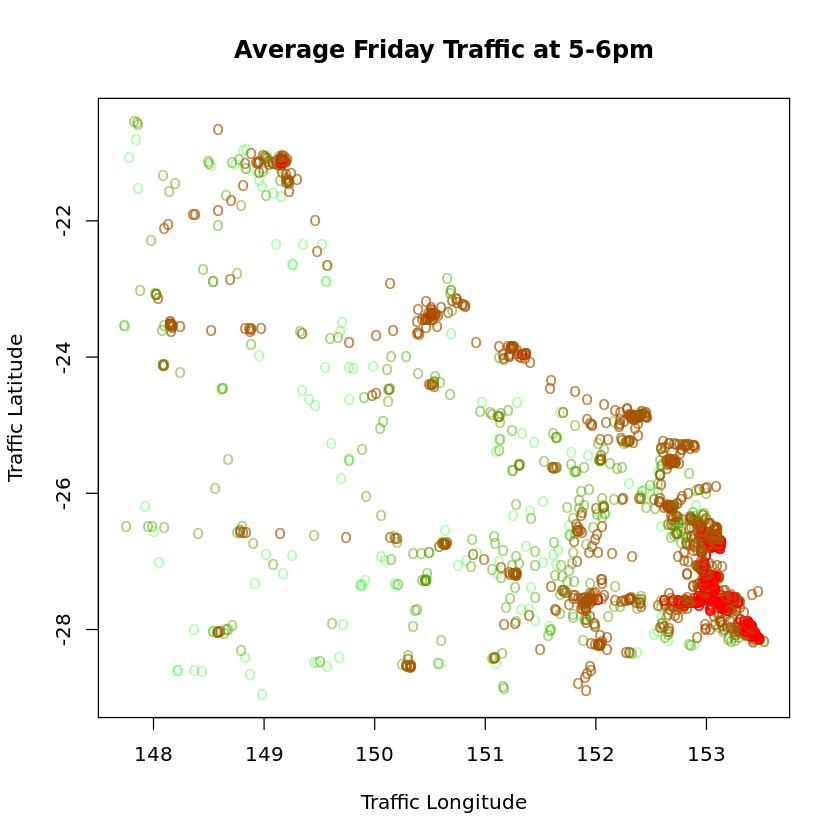

In [303]:
Traffic_Fri_COB_2016 <- Traffic_Day_of_Week[["Friday"]][Traffic_Day_of_Week[["Friday"]]$hour == 17 &
                                                        Traffic_Day_of_Week[["Friday"]]$year == 2016,]
plot(Traffic_Fri_COB_2016$latitude~Traffic_Fri_COB_2016$longitude,
     col=ifelse(Traffic_Fri_COB_2016$traffic<=10,rgb(0,1,0,0.3),
                ifelse(Traffic_Fri_COB_2016$traffic<=50,rgb(0.33,0.66,0,0.5),
                       ifelse(Traffic_Fri_COB_2016$traffic<=1000,rgb(0.66,.33,0,0.7),
                              rgb(1,0,0,1)))),
     pch='o',
     xlab='Traffic Longitude',
     ylab='Traffic Latitude',
     main="Average Friday Traffic at 5-6pm")

### Estimating average Traffic at Crash Locations
Crash data does not have the average Traffic at every crash location. To estimate traffic, we relied on K Nearest Neighbor Regression (K-NN Regression) using Latitude and Longitude as predictors.

For example, to find the traffic at all crash locations on Fridays 17:00 in 2016, we calculate the mean traffic of the nearest K = 3 points in the traffic data that are closest to the crash locations at the same day/time/year:

In [304]:
library("FNN")

Crash_Sev_Fri_COB_2016 <- Crash_Sev[(Crash_Sev$year == 2016 &
                                     Crash_Sev$day_of_week == "Friday" &
                                     Crash_Sev$hour == 17),]

Crash_Sev_Fri_COB_2016$traffic <- knn.reg(train = Traffic_Fri_COB_2016[, c("longitude", "latitude")],
                                          test = Crash_Sev_Fri_COB_2016[, c("longitude", "latitude")],
                                          y = Traffic_Fri_COB_2016["traffic"],
                                          k = 3)[["pred"]]

The Scatter plot below showing Traffic average at Crash locations on Fridays 5:00pm 2016.
It clearly reflects the same pattern as the Traffic patterns on the same day/time/year above:

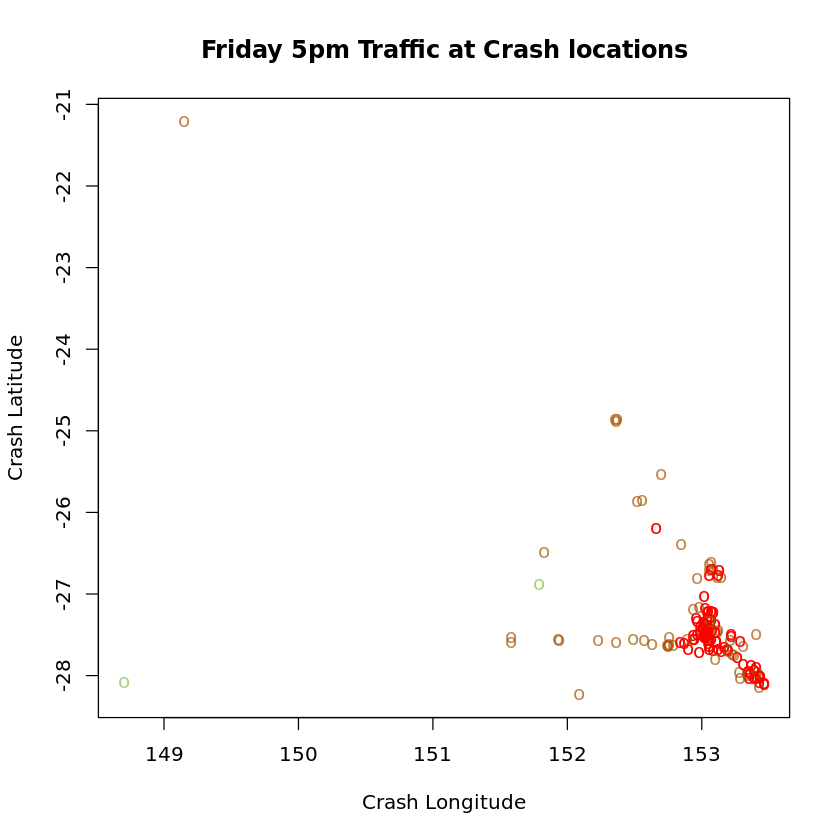

In [305]:
plot(Crash_Sev_Fri_COB_2016$latitude~Crash_Sev_Fri_COB_2016$longitude,
     col=ifelse(Crash_Sev_Fri_COB_2016$traffic<=10,rgb(0,1,0,0.3),
                ifelse(Crash_Sev_Fri_COB_2016$traffic<=50,rgb(.33,.66,0,0.5),
                       ifelse(Crash_Sev_Fri_COB_2016$traffic<=1000,rgb(0.66,.33,0,0.7),
                              rgb(1,0,0,1)))),
     pch='o',
     xlab='Crash Longitude',
     ylab='Crash Latitude',
     main="Friday 5pm Traffic at Crash locations")

#### Generalize K-NN to calculate average traffic at ALL crash locations:
- Create a Function **get_Traffic_at_Crash()** to calculate average traffic at a particular location/day/hour/year.
- Iterate through the Crash locations data set calling the function at every crash instance.
- Add the calculated Traffic data set to a new column in Crash Locations called "traffic"

Note: the process below could take up to 3-5 minutes to complete

In [306]:
get_Traffic_at_Crash <- function (Day, Hour, Year, Long, Lati, TrafficDF = Traffic_Day_of_Week)
{
    Traffic_sub <- get_Traffic_sub(Day, Hour, Year, TrafficDF)
    knn.reg(train = Traffic_sub[, c("longitude", "latitude")],
            test = c(Long, Lati),
            y = Traffic_sub["traffic"],
            k = 3)[["pred"]]
}

get_Traffic_sub <- function(Day, Hour, Year, TrafficDF)
{
    TrafficDF[[Day]][(TrafficDF[[Day]]$hour == Hour & TrafficDF[[Day]]$year == Year),]
}

In [307]:
traffic_data <- data.frame(Traffic = c())
for (row in 1:nrow(Crash_Sev))
{
    traffic_data[row,"Traffic"] <- with(Crash_Sev[row,], get_Traffic_at_Crash(Day = day_of_week,
                                                                              Hour = hour, Year = year,
                                                                              Long = longitude, Lati = latitude))
}


In [308]:
Crash_Sev$traffic <- traffic_data$Traffic
summary(Crash_Sev)

              severity          year         day_of_week        month      
 Fatal            :  516   Min.   :2014   Friday   :5251   May     : 2968  
 Hospitalisation  :13286   1st Qu.:2014   Monday   :4510   August  : 2859  
 Medical treatment:15153   Median :2015   Saturday :4259   March   : 2834  
 Minor injury     : 3394   Mean   :2015   Sunday   :3709   October : 2787  
                           3rd Qu.:2016   Thursday :5119   July    : 2766  
                           Max.   :2016   Tuesday  :4644   November: 2758  
                                          Wednesday:4857   (Other) :15377  
      hour         longitude        latitude         postcode    
 Min.   : 0.00   Min.   :147.7   Min.   :-29.01   4350   :  810  
 1st Qu.: 9.00   1st Qu.:152.8   1st Qu.:-27.63   4740   :  620  
 Median :13.00   Median :153.0   Median :-27.48   4670   :  572  
 Mean   :12.66   Mean   :152.7   Mean   :-26.97   4207   :  542  
 3rd Qu.:16.00   3rd Qu.:153.1   3rd Qu.:-27.07   4215   :  51

#### Scatter plot the traffic at all Crash locations:
- *Green* is low traffic
- *Red* is high traffic

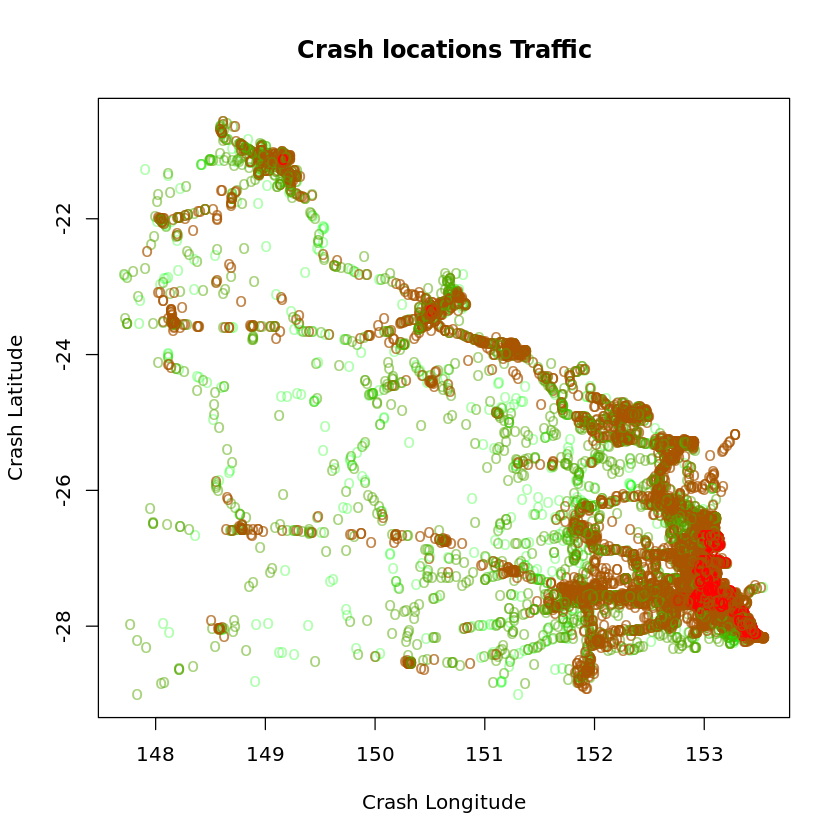

In [309]:
plot(Crash_Sev$latitude~Crash_Sev$longitude,
     col=ifelse(Crash_Sev$traffic<=10,rgb(0,1,0,0.3),
                ifelse(Crash_Sev$traffic<=50,rgb(.33,.66,0,0.5),
                       ifelse(Crash_Sev$traffic<=1000,rgb(0.66,.33,0,0.7),
                              rgb(1,0,0,1)))),
     pch='o', xlab='Crash Longitude', ylab='Crash Latitude', main="Crash locations Traffic")

#### Crash Severity plot at different locations:
- *Green* is Not Severe
- *Red* is Severe

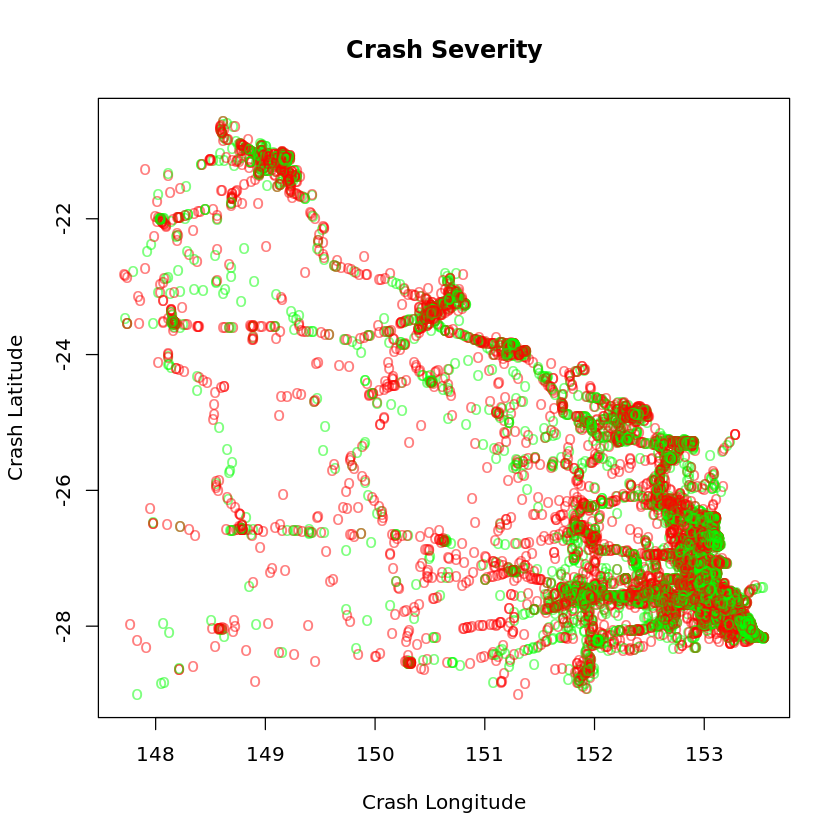

In [310]:
plot(Crash_Sev$latitude~Crash_Sev$longitude,
     col=ifelse(Crash_Sev$sev==TRUE,rgb(1,0,0,0.5),rgb(0,1,0,0.5)),
     pch='o', xlab='Crash Longitude', ylab='Crash Latitude', main="Crash Severity")

# Making the Data Confess

## Exploratory Analysis of the Crash Locations data

### Traffic vs Speed
- Crash severity between Traffic and Speed shows that Severe crashes tend to occur at High Speed but Low Traffic conditions (Red cluster).
- Unsevere crashes seem to be concentrated on Low speed but high traffic regions (Green cluster).
- The data points are closely meshed together, which will make it hard to create an efficient classification model.

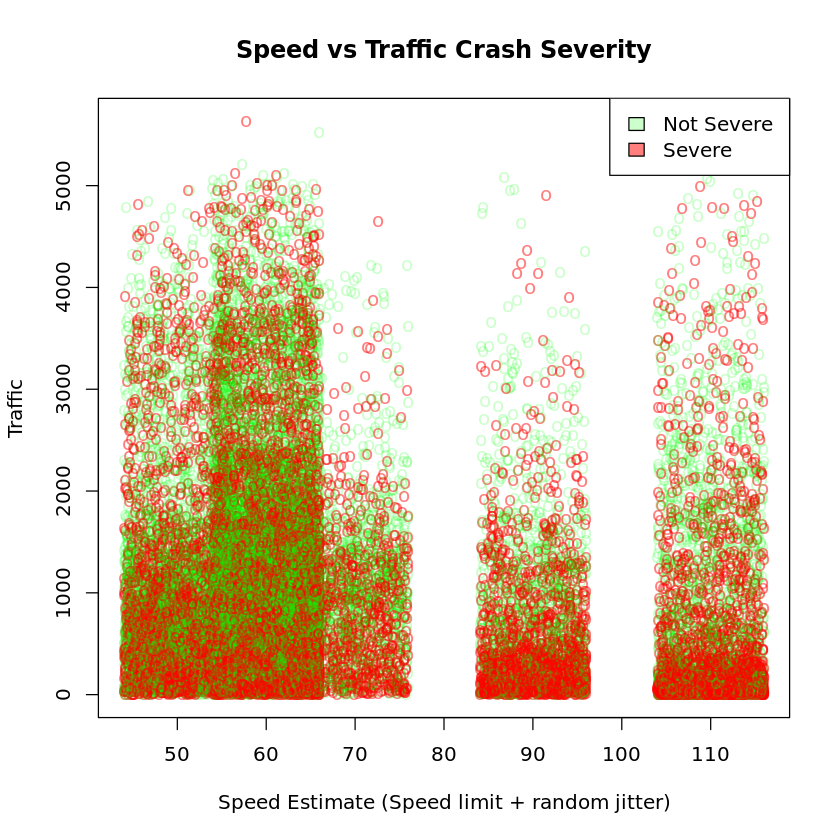

In [311]:
plot(Crash_Sev$traffic~jitter(Crash_Sev$speed_limit, 3),
     col=ifelse(Crash_Sev$sev==TRUE,rgb(1,0,0,0.5),rgb(0,1,0,0.2)),
     pch="o", xlab='Speed Estimate (Speed limit + random jitter)', ylab='Traffic',
     main="Speed vs Traffic Crash Severity")
legend("topright", c("Not Severe","Severe"),fill=c(rgb(0,1,0,0.2), rgb(1,0,0,0.5)))

### Effects of every predictor on crash severity
The graphs below show the relationship between every important predictor and the frequency of crashes

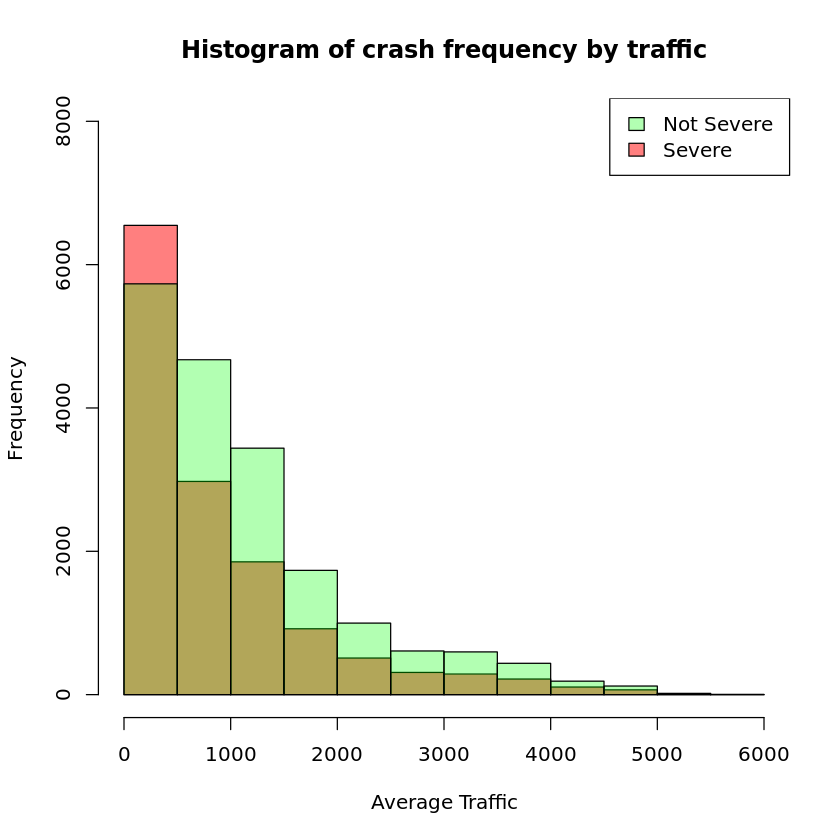

In [313]:
hist(Crash_Sev$traffic[Crash_Sev$sev == TRUE], col=rgb(1,0,0,0.5),
     main="Histogram of crash frequency by traffic",  ylim = c(0,8000), xlab="Average Traffic")
hist(Crash_Sev$traffic[Crash_Sev$sev == FALSE], col=rgb(0,1,0,0.3),add=TRUE)
legend("topright", c("Not Severe","Severe"),fill=c(rgb(0,1,0,0.3), rgb(1,0,0,0.5)))

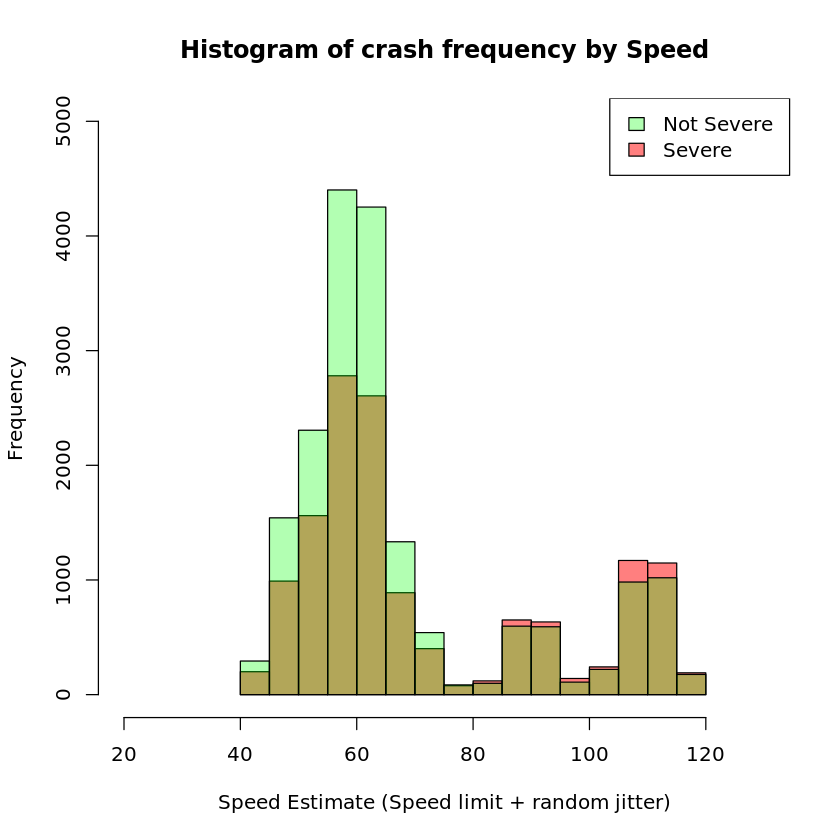

In [316]:
hist(jitter(Crash_Sev$speed_limit[Crash_Sev$sev == TRUE], 3), col=rgb(1,0,0,0.5),
     main="Histogram of crash frequency by Speed", ylim= c(0,5000), xlim= c(20,130),
     xlab="Speed Estimate (Speed limit + random jitter)")
hist(jitter(Crash_Sev$speed_limit[Crash_Sev$sev == FALSE], 3) , col=rgb(0,1,0,0.3),add=TRUE)
legend("topright", c("Not Severe","Severe"),fill=c(rgb(0,1,0,0.3), rgb(1,0,0,0.5)))

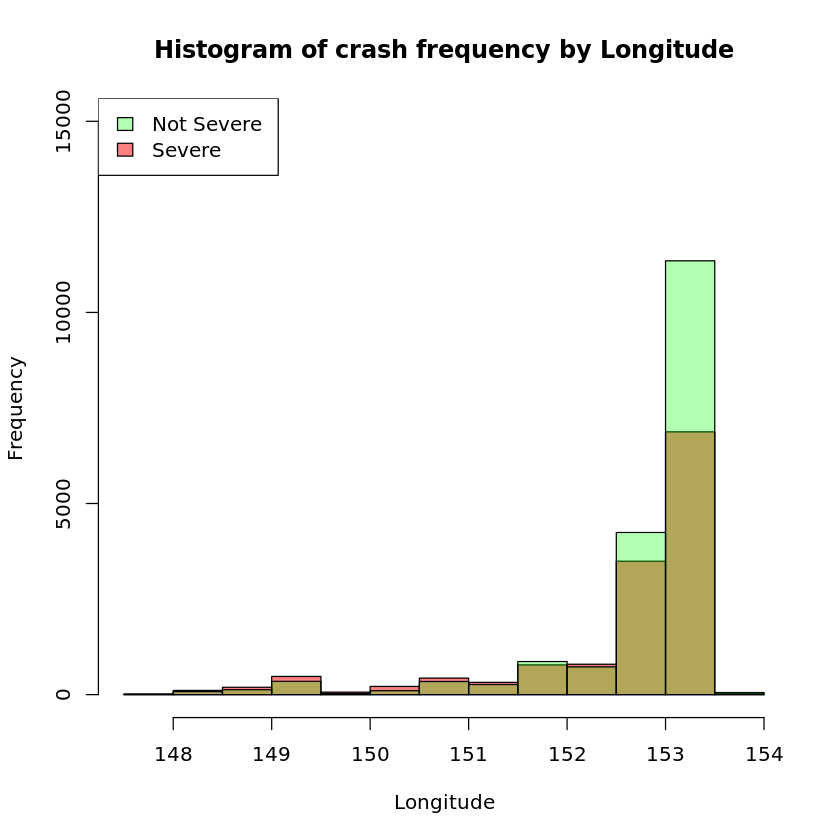

In [317]:
hist(Crash_Sev$longitude[Crash_Sev$sev == TRUE], col=rgb(1,0,0,0.5),
     main="Histogram of crash frequency by Longitude", ylim = c(0,15000), xlab="Longitude")
hist(Crash_Sev$longitude[Crash_Sev$sev == FALSE], col=rgb(0,1,0,0.3),add=TRUE)
legend("topleft", c("Not Severe","Severe"),fill=c(rgb(0,1,0,0.3), rgb(1,0,0,0.5)))

**Curved-Obscured road are clearly more dangerous than others** with 60% severe casualties

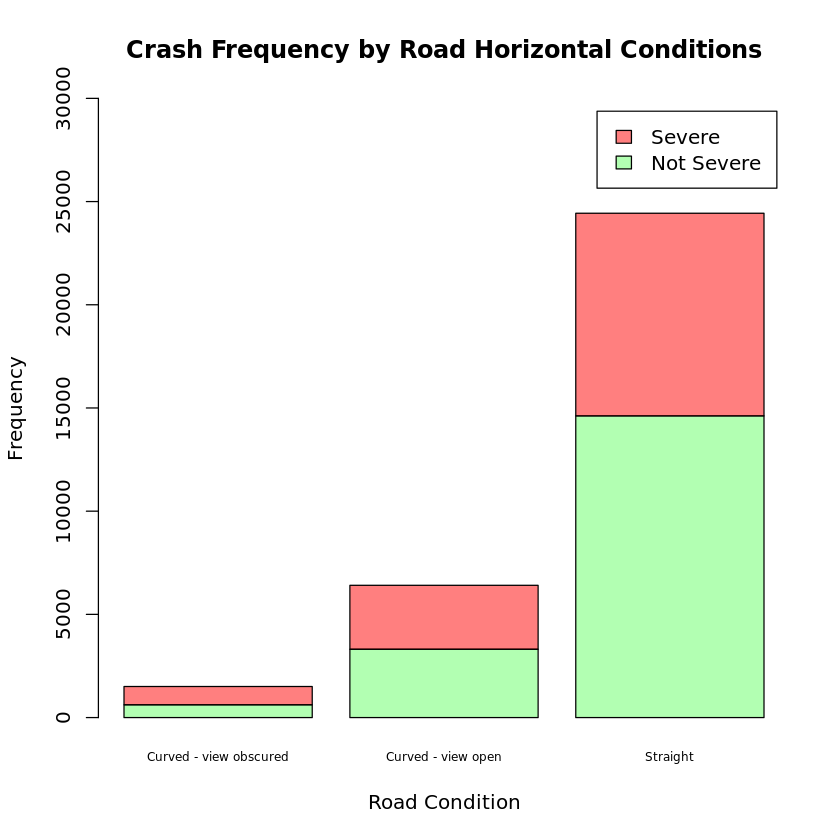

In [320]:
counts_by_rdcond <- table(Crash_Sev$sev, Crash_Sev$road_hor_al)

barplot(counts_by_rdcond, main="Crash Frequency by Road Horizontal Conditions", ylim = c(0,30000),
        xlab="Road Condition", ylab= "Frequency", col=c(rgb(0,1,0,0.3), rgb(1,0,0,0.5)),
        cex.names=0.6, legend = c("Not Severe", "Severe"))

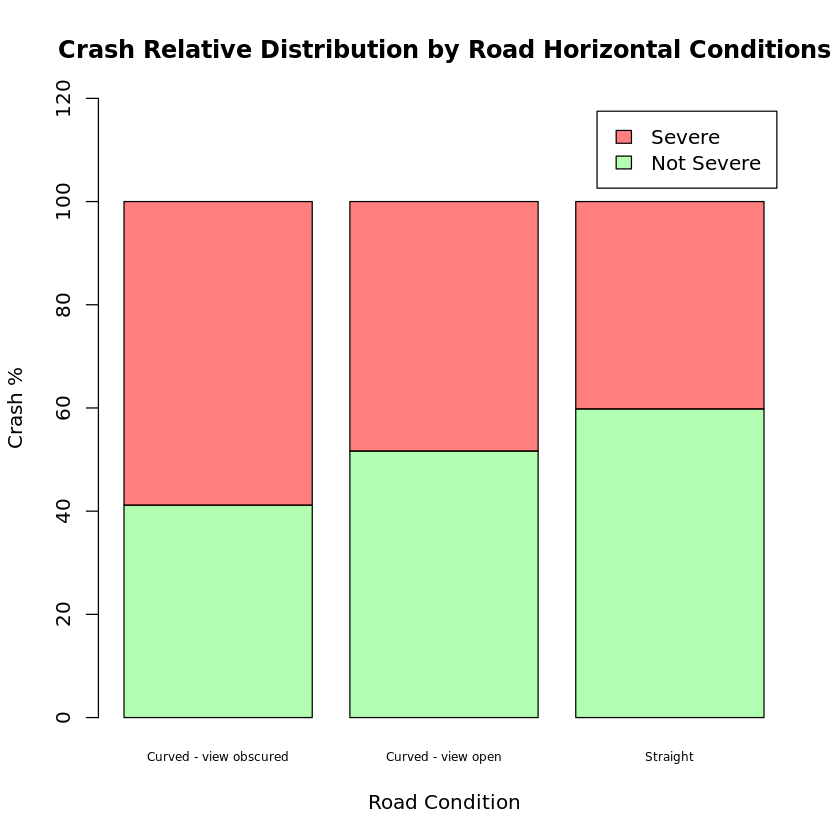

In [321]:
relative_counts_rdcond <- counts_by_rdcond

for (col in 1:ncol(counts_by_rdcond)){
    relative_counts_rdcond[1, col]<- counts_by_rdcond[1,col]*100/(counts_by_rdcond[1,col] + counts_by_rdcond[2,col])
    relative_counts_rdcond[2, col]<- 100 - relative_counts_rdcond[1, col]
}

barplot(relative_counts_rdcond, main="Crash Relative Distribution by Road Horizontal Conditions", ylim = c(0,120),
        xlab="Road Condition", ylab= "Crash %", col=c(rgb(0,1,0,0.3), rgb(1,0,0,0.5)),
        cex.names=0.6, legend = c("Not Severe", "Severe"))

**Day of the week seems to have very small influence on variabiltiy between Severe and Not Severe crashes**

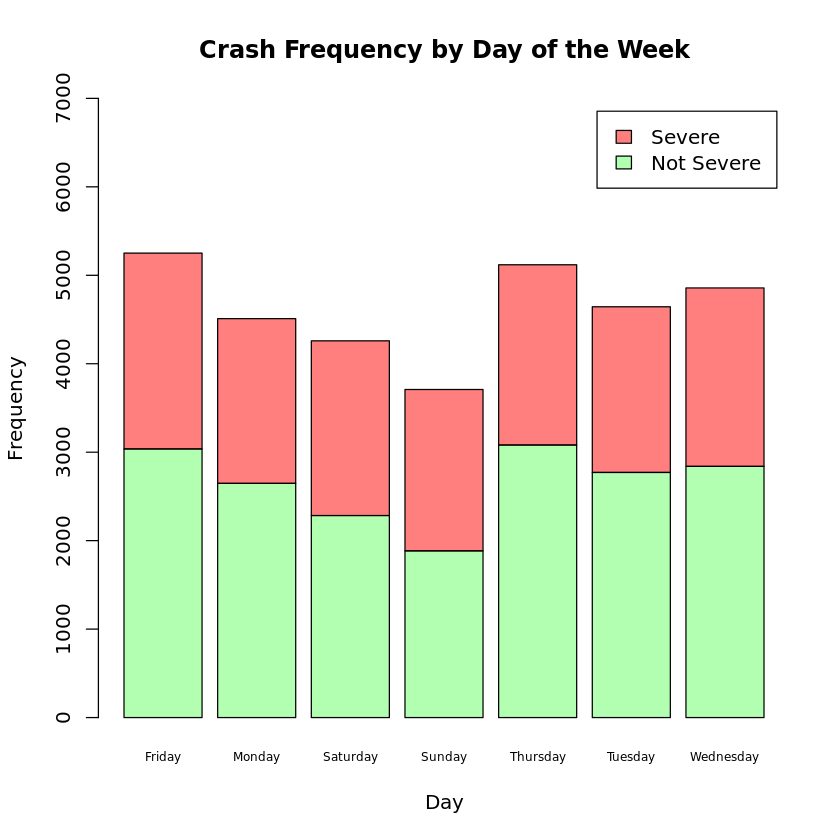

In [323]:
counts_by_day <- table(Crash_Sev$sev, Crash_Sev$day_of_week)
barplot(counts_by_day, main="Crash Frequency by Day of the Week", ylim = c(0, 7000),
        xlab="Day", ylab="Frequency", col=c(rgb(0,1,0,0.3), rgb(1,0,0,0.5)),
        cex.names=0.6, legend = c("Not Severe", "Severe"))


       
          Sunday Saturday   Friday Wednesday   Monday  Tuesday Thursday
  FALSE 50.82232 53.62761 57.83660  58.47231 58.71397 59.66839 60.20707
  TRUE  49.17768 46.37239 42.16340  41.52769 41.28603 40.33161 39.79293

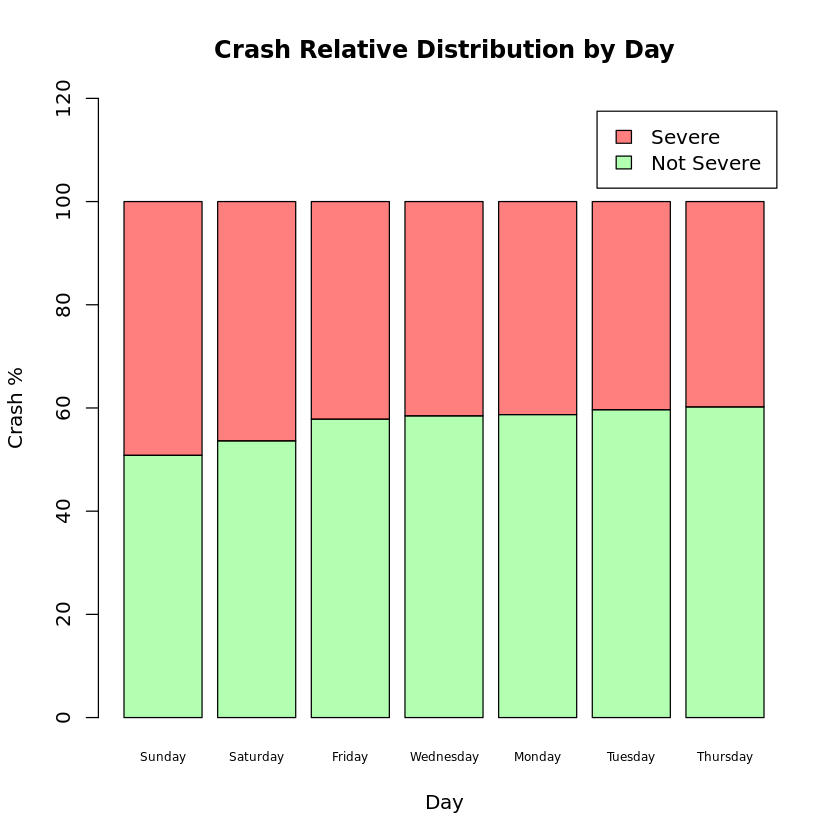

In [397]:
relative_counts_day <- counts_by_day

for (col in 1:ncol(counts_by_day))
{
    relative_counts_day[1, col]<- counts_by_day[1,col]*100/(counts_by_day[1,col] + counts_by_day[2,col])
    relative_counts_day[2, col]<- 100 - relative_counts_day[1, col]
}

ordered_rel_day <- relative_counts_day[, order(decreasing = TRUE, relative_counts_day["TRUE",])]
ordered_rel_day
barplot(ordered_rel_day, main="Crash Relative Distribution by Day", ylim = c(0,120),
        xlab="Day", ylab= "Crash %", col=c(rgb(0,1,0,0.3), rgb(1,0,0,0.5)),
        cex.names=0.6, legend = c("Not Severe", "Severe"))

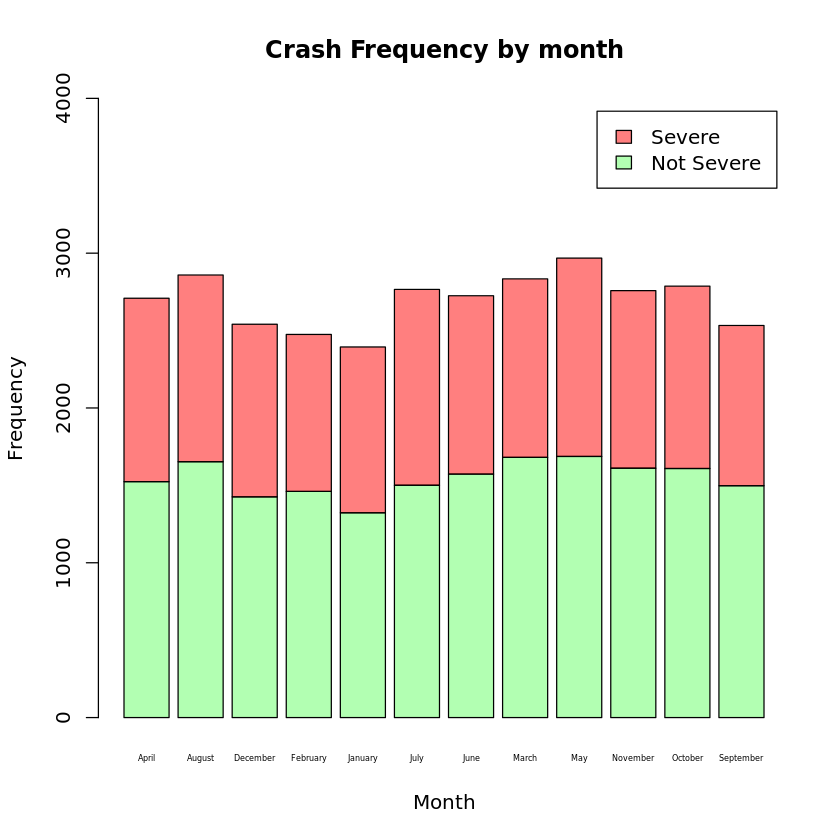

In [329]:
counts_by_month <- table(Crash_Sev$sev, Crash_Sev$month)
barplot(counts_by_month, main="Crash Frequency by month", ylim = c(0, 4000),
        xlab="Month", ylab="Frequency", col=c(rgb(0,1,0,0.3), rgb(1,0,0,0.5)),
        cex.names=0.4, legend = c("Not Severe", "Severe"))

       
            July  January December    April      May     June  October   August
  FALSE 54.26609 55.26316 56.11964 56.25692 56.83962 57.72477 57.73233 57.81742
  TRUE  45.73391 44.73684 43.88036 43.74308 43.16038 42.27523 42.26767 42.18258
       
        November February September    March
  FALSE 58.41189 59.03030  59.13936 59.31546
  TRUE  41.58811 40.96970  40.86064 40.68454

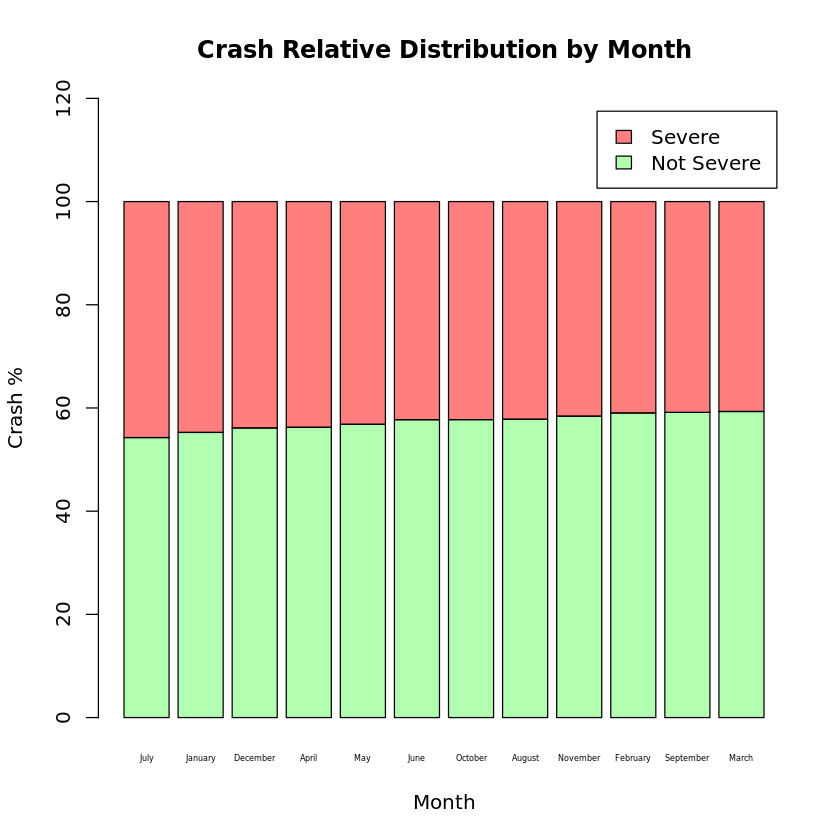

In [398]:
relative_counts_month <- counts_by_month

for (col in 1:ncol(counts_by_month))
{
    relative_counts_month[1, col]<- counts_by_month[1,col]*100/(counts_by_month[1,col] + counts_by_month[2,col])
    relative_counts_month[2, col]<- 100 - relative_counts_month[1, col]
}

ordered_rel_month <- relative_counts_month[, order(decreasing = TRUE, relative_counts_month["TRUE",])]
ordered_rel_month

barplot(ordered_rel_month, main="Crash Relative Distribution by Month", ylim = c(0,120),
        xlab="Month", ylab= "Crash %", col=c(rgb(0,1,0,0.3), rgb(1,0,0,0.5)),
        cex.names=0.4, legend = c("Not Severe", "Severe"))

## Logistic Regression

- Split the data into Training and Testing (80/20).
- Try different predictors and predictors relationship to maximize the AUC.

In [330]:
set.seed(8888) # Set a seed for reproducible random number generator;
Crash_Sev$sev <- as.numeric(Crash_Sev$sev)
trainidx<-sample(nrow(Crash_Sev), floor(nrow(Crash_Sev) * 0.80))
Crash_Sev_train<-Crash_Sev[trainidx,] #Accessing all trainidx rows
Crash_Sev_test<-Crash_Sev[-trainidx,] #Accessing all rows except trainidx
sprintf("Size of Training data: %d", nrow(Crash_Sev_train))
sprintf("Size of Testing data: %d", nrow(Crash_Sev_test))

[1] "Size of Training data: 25879"

[1] "Size of Testing data: 6470"

In [402]:
logfit <- glm(sev ~ 
              longitude + month + hour +
              speed_limit*traffic + I(traffic^2) +
              road_hor_al + lighting_cond,
              data = Crash_Sev_train, family=binomial)
summary(logfit)              


Call:
glm(formula = sev ~ longitude + month + hour + speed_limit * 
    traffic + I(traffic^2) + road_hor_al + lighting_cond, family = binomial, 
    data = Crash_Sev_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7571  -1.0077  -0.8723   1.2441   1.6158  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          1.577e+01  2.232e+00   7.067 1.58e-12 ***
longitude                           -1.025e-01  1.452e-02  -7.055 1.72e-12 ***
monthAugust                         -6.899e-02  6.214e-02  -1.110  0.26689    
monthDecember                        2.286e-02  6.357e-02   0.360  0.71914    
monthFebruary                       -9.035e-02  6.412e-02  -1.409  0.15882    
monthJanuary                         4.541e-02  6.484e-02   0.700  0.48373    
monthJuly                            1.046e-01  6.202e-02   1.686  0.09183 .  
monthJune                           -7.247e-02  6.283e-02  -1.15

In [346]:
logfit2 <- glm(sev ~ longitude + month + speed_limit + traffic + road_hor_al + lighting_cond,
              data = Crash_Sev_train, family=binomial)
summary(logfit2)


Call:
glm(formula = sev ~ longitude + month + speed_limit + traffic + 
    road_hor_al + lighting_cond, family = binomial, data = Crash_Sev_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8081  -1.0201  -0.8853   1.2484   1.7647  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         21.7249943  2.1337390  10.182  < 2e-16 ***
longitude                           -0.1416291  0.0139039 -10.186  < 2e-16 ***
monthAugust                         -0.0683159  0.0620194  -1.102  0.27067    
monthDecember                        0.0272815  0.0634044   0.430  0.66699    
monthFebruary                       -0.0816096  0.0639950  -1.275  0.20222    
monthJanuary                         0.0500082  0.0646837   0.773  0.43945    
monthJuly                            0.1002857  0.0618888   1.620  0.10514    
monthJune                           -0.0729625  0.0626927  -1.164  0.24450    
monthMarch  

[1] "AUC for testing data: 0.615404"

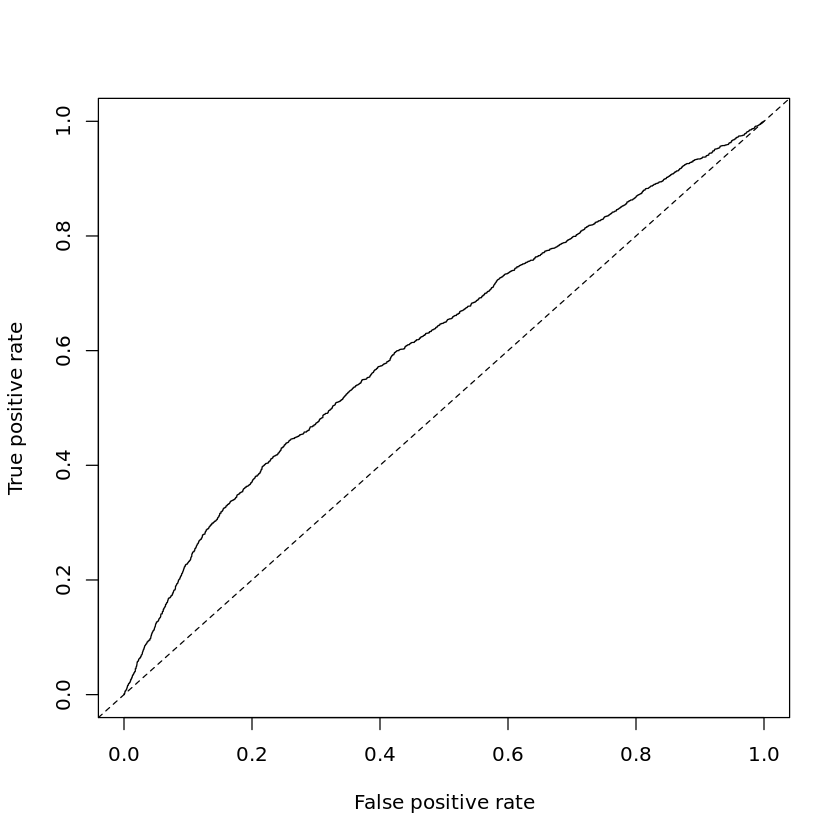

In [403]:
library("ROCR")

Crash_Sev_test$sev_prob <- predict(logfit,Crash_Sev_test,type="response")

testROC<-performance(prediction(Crash_Sev_test$sev_prob,Crash_Sev_test$sev),"tpr","fpr")
plot(testROC)
abline(a=0, b= 1,lty=2)

testAUC<-as.double(performance(prediction(Crash_Sev_test$sev_prob,Crash_Sev_test$sev),"auc")@y.values)
sprintf("AUC for testing data: %f", testAUC)

In [404]:
Crash_Sev_test$sev_prob2<-as.integer(Crash_Sev_test$sev_prob >= 0.5)
Crash_Wrong <- Crash_Sev_test[Crash_Sev_test$sev_prob2 != Crash_Sev_test$sev,]
#Accuracy
sprintf("Prediction Accuracy: %f", 1 - nrow(Crash_Wrong)/nrow(Crash_Sev_test))

[1] "Prediction Accuracy: 0.623184"

## LDA Classification
Not very different

[1] 0.6154095

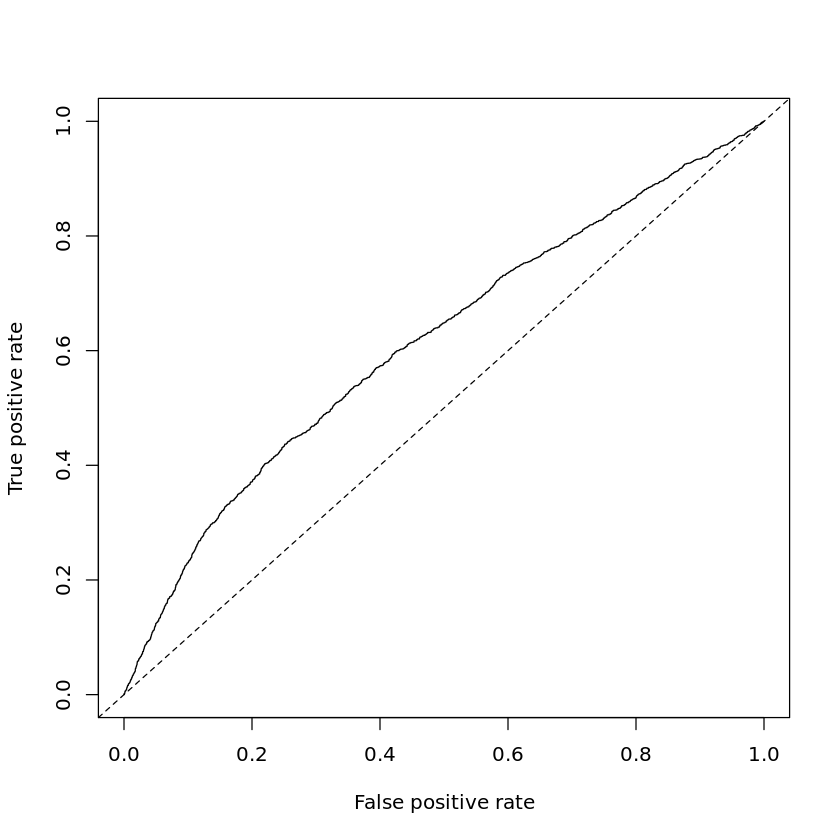

In [405]:
library("MASS")
ldafit<-lda(sev ~
            longitude + month + hour +
            speed_limit*traffic + I(traffic^2) +
            road_hor_al + lighting_cond,
            data = Crash_Sev_train)
temp<-predict(ldafit,Crash_Sev_test,type="response")
Crash_Sev_test$sev_prob_lda<-temp$posterior[,2]
testROC_lda<-performance(prediction(Crash_Sev_test$sev_prob_lda,Crash_Sev_test$sev),"tpr","fpr")
plot(testROC_lda)
abline(a=0, b= 1,lty=2)
testAUC_lda<-as.double(performance(prediction(Crash_Sev_test$sev_prob_lda,Crash_Sev_test$sev),"auc")@y.values)
testAUC_lda

# Conclusion
The under performance of the Severity Classification model indicates that Crashes severity are caused by factors that were not captured in the data.

Some of these factors are drivers **Gender, Age, Intoxication as well as the road worthy of vehicles**.

The model proves that it is not enough to rely on traffic level and speed estimates to predict crash severity.